# tinybEEr Project

## Marcus Deichman, Julia Combs, Jasmine Gill

Notebook will create, train, and compress the beer classification model that will be deployed on the tinyML device

# import necessary packages


In [27]:
# import all necessary packages 

import pandas as pd
import re
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# for min/max scaling
from sklearn.preprocessing import MinMaxScaler

# for machine learning data prep
from sklearn.model_selection import train_test_split # used to split the data into training and test sets
from sklearn.datasets import make_blobs


# download the data

In [28]:
# read in data into dataframe

beer_url = 'https://raw.githubusercontent.com/niklasax/Final_Project/main/data_cleaning/beer_cleaned.csv'
breweries_url = 'https://raw.githubusercontent.com/niklasax/Final_Project/main/data_cleaning/brewery_cleaned.csv'

# visualize the data as data frame
beer_df = pd.read_csv(beer_url)
breweries_df = pd.read_csv(breweries_url)
beer_df.head(4)

,abv,ibu,beer_id,beer_name,style,style_group,ounces,brewery_id
0,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),American Pale Ale (APA),12.0,177
1,0.099,92.0,1036,Lower De Boom,American Barleywine,other,8.4,368
2,0.079,45.0,1024,Fireside Chat,Winter Warmer,other,12.0,368
3,0.044,42.0,876,Bitter American,American Pale Ale (APA),American Pale Ale (APA),12.0,368


In [29]:
# split the data into abv, ibu, beer_name, and style as float values

abv_flt = beer_df['abv'].astype(float)
ibu_flt = beer_df['ibu'].astype(float)

# look at organization of data
print('abv_flt:', abv_flt) 
print('ibu_flt:', ibu_flt)

abv_flt: 0       0.061
1       0.099
2       0.079
3       0.044
4       0.049
        ...  
1321    0.077
1322    0.069
1323    0.060
1324    0.067
1325    0.055
Name: abv, Length: 1326, dtype: float64
ibu_flt: 0       60.0
1       92.0
2       45.0
3       42.0
4       17.0
        ... 
1321    30.0
1322    69.0
1323    50.0
1324    45.0
1325    40.0
Name: ibu, Length: 1326, dtype: float64


In [47]:
# encode the styles list text --> numeric values

def unique(list):

    list_set = set(list)

    unique_list = (list(list_set))


    
styles = beer_df['style']
print('styles:', styles)

styles_str = beer_df['style'].str

print('styles_str', styles_str)

unique(styles_str)

SyntaxError: invalid syntax (1645705000.py, line 14)

In [45]:
whos

Variable           Type            Data/Info
--------------------------------------------
MinMaxScaler       type            <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
a                  function        <function <lambda> at 0x2aca0bee0>
abv                ndarray         1326: 1326 elems, type `object`, 10608 bytes
abv_flt            Series          0       0.061\n1       0.<...>gth: 1326, dtype: float64
abv_ibu            ndarray         1326x2: 2652 elems, type `float64`, 21216 bytes
abv_std            Series          0       0.346939\n1      <...>gth: 1326, dtype: float64
avb_std            Series          0       0.346939\n1      <...>gth: 1326, dtype: float64
beer_df            DataFrame               abv   ibu  beer_i<...>\n[1326 rows x 8 columns]
beer_name          ndarray         1326: 1326 elems, type `object`, 10608 bytes
beer_url           str             https://raw.githubusercon<...>cleaning/beer_cleaned.csv
breweries_df       DataFrame            brewery_id 

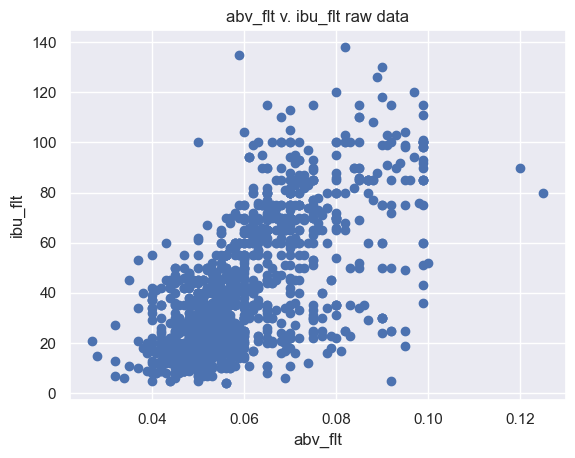

In [9]:
# plot the raw abv and ibut data
plt.scatter(
    x = abv_flt, 
    y = ibu_flt)
plt.title('abv_flt v. ibu_flt raw data')
plt.xlabel('abv_flt')
plt.ylabel('ibu_flt')
plt.show()

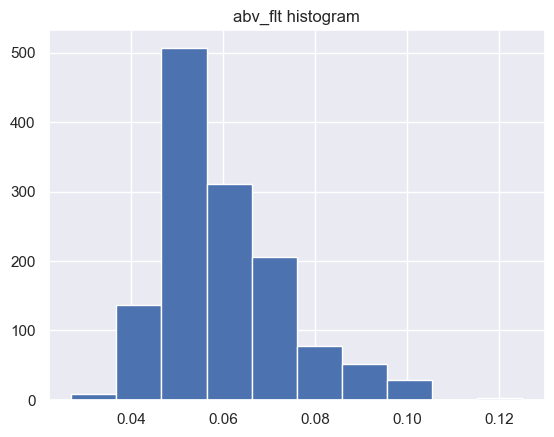

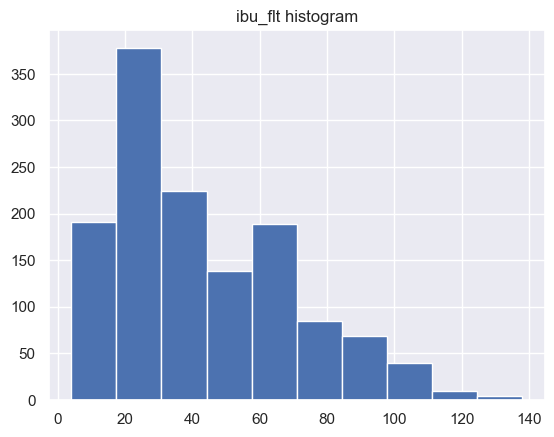

In [23]:
# look at the histogram of the abv_flt and ibu_flt data
abv_flt.hist()
plt.title('abv_flt histogram')
plt.show()
ibu_flt.hist()
plt.title('ibu_flt histogram')
plt.show()


From the scatter plot of the raw data, and the histograms it is evident that the abv data is very collected in a very small range. In order to distinguish the data, min-max scaling will be used.

REASON: Features with higher ranging numbers contribute more to distance metrics hence the decision of the ML algorithms will be influenced more by the high magnitude features. 

In [25]:
# use min-max scaling to separate the abv data
# y = (x – min) / (max – min)

abv_flt = abv_flt.reshape(-1, 1)
scalar = MinMaxScaler(feature_range=(0, 0.12))
abv_scaled = scalar.fit_transform(abv_flt)


AttributeError: 'Series' object has no attribute 'reshape'

In [54]:
# split the data into training and testing sets

#abv_train, abv_test, ibu_train, ibu_test, beer_name_train, beer_name_test, style_train, style_test = train_test_split(abv, ibu, beer_name, style, test_size = 0.2)

abv_ibu_train, abv_ibu_test = train_test_split(abv_ibu, test_size=0.3)

In [59]:
num_train_data = abv_ibu_train.shape[0]
print('Number of training data points:', num_train_data)

num_test_data = abv_ibu_test.shape[0]
print('Number of testing data point:', num_test_data)


Number of training data points: 928
Number of testing data point: 398


[2 2 5 0 1 0 1 2 0 0 3 0 8 7 1 5 3 7 5 1 5 8 8 5 7 2 2 1 8 5 5 4 9 9 1 4 3
 2 4 5 9 8 0 9 2 8 4 0 7 4 0 2 2 1 0 5 0 1 4 2 0 2 9 0 5 0 3 1 5 3 2 5 0 5
 5 9 0 8 0 8 5 9 7 7 9 5 7 2 2 2 2 2 5 3 2 2 2 8 8 4 2 5 5 2 7 9 2 2 9 2 8
 2 2 2 5 2 8 8 1 5 8 1 9 5 2 4 2 0 0 2 8 8 7 4 9 5 0 3 8 4 2 2 7 2 8 0 1 5
 2 5 3 0 2 2 8 2 0 1 0 7 0 0 2 0 0 8 9 2 9 5 7 9 8 0 5 8 1 0 5 1 2 1 4 4 0
 4 4 9 2 0 2 8 3 7 2 5 2 1 8 2 2 2 0 2 5 6 2 5 7 6 2 2 8 2 2 0 5 7 1 5 5 8
 8 2 1 2 5 2 2 7 9 5 5 0 6 7 4 9 9 2 4 1 5 3 9 1 8 5 1 2 2 7 0 1 5 1 0 2 0
 4 0 0 2 4 3 6 1 9 2 7 5 8 4 0 8 0 9 5 9 0 0 1 7 9 4 2 8 5 6 2 1 1 8 4 2 2
 2 2 0 7 5 9 2 9 0 8 2 3 8 1 2 8 5 1 2 5 2 4 0 7 0 9 2 4 2 0 8 2 3 5 0 8 0
 2 5 8 0 0 2 5 5 2 1 0 2 2 2 7 5 9 1 2 9 0 8 9 8 3 8 8 2 4 8 5 8 7 4 5 0 4
 1 2 5 4 1 2 4 9 5 5 0 3 5 3 2 1 9 9 5 7 5 3 5 0 2 5 2 4 2 5 2 1 7 9 9 4 1
 2 2 2 2 0 0 9 5 5 8 2 0 2 5 2 9 5 5 2 8 1 0 0 8 2 2 2 0 9 0 2 4 4 0 9 9 9
 1 0 1 2 1 6 4 8 5 0 7 2 7 2 4 5 3 9 0 0 3 8 8 8 5 8 0 1 8 5 1 0 2 9 0 5 8
 9 2 2 2 0 4 2 5 4 9 2 2 

/Users/juliacombs/Applications/anaconda3/envs/EE595/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


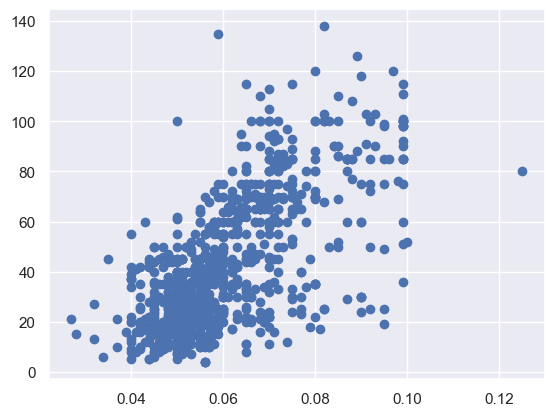

In [64]:
num_centers = 10

from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=num_centers)
kmeans.fit(abv_ibu_train)

y_kmeans = kmeans.predict(abv_ibu_train)
y_kmeans

plt.scatter(abv_ibu_train[:,0], abv_ibu_train[:,1])

print(y_kmeans)

# look at different dataset with "srm"

In [3]:
# different beer cvs file

#beers_url = "https://raw.githubusercontent.com/aureliusbd/tinybEEr/main/beers.csv"

#beer_opendata_df = pd.read_csv(beers_url)
#beer_opendata_df.head(3)



/var/folders/bw/mcsyxzmn1hb9278cn9k93vch0000gn/T/ipykernel_42426/1325035753.py:5: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,46,48,49,50,51,52,54,58,60,61,62,63,64,66,70,71,72,73,74,75,76,78,82,84,85,86,87,88,90,94,96,97,98,99,100,102,108,109,110,111,112,114,118,119,121,122,123,124,126,131,133,134,135,136,138,143,145,146,147,148,150,155,157,158,159,160,162,167,169,170,171,172,174,179,181,182,183,184,186,191,193,194,195,196,198,203,205,206,207,215,217,219,227,229,231,239,240,241,242,243,245,247,251,253,255,257,263,264,266,268,276,278,280,288,290,292,300,302,304,312,314,316,324,326,328,336,338,340,348,349,350,351,353,355,363,364,366,368,376,378,380,388,390,392,400,402,404,412,414,416,424,426,428,436,438,440,448,450,452,460,462,464,474,476,484,486,488,496,498,500,508,510,512,520,522,524,532,534,536,544) have mixed types. Specify dtype option on import or set low_memory=False.
  beer_opendata_df = pd.read_csv(beers_url)


,id,brewery_id,name,cat_id,style_id,abv,ibu,srm,upc,filepath,...,Unnamed: 535,Unnamed: 536,Unnamed: 537,Unnamed: 538,Unnamed: 539,Unnamed: 540,Unnamed: 541,Unnamed: 542,Unnamed: 543,Unnamed: 544
0,1,812,Hocus Pocus,11,116,4.5,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,264,Grimbergen Blonde,-1,-1,6.7,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,779,Widdershins Barleywine,-1,-1,9.1,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#srm = beer_opendata_df.to_numpy()[:,7]
#abv_beers = beer_opendata_df.to_numpy()[:,5]
#print('srm shape orig:', srm.shape)

#def convert_to_float(value):
    #try:
        #return float(value)
    #except ValueError:
        #return np.nan
    
#srm_flt = np.vectorize(convert_to_float)(srm)
#abv_beers_flt = np.vectorize(convert_to_float)(abv_beers)

#print('srm new shape:', srm_flt.shape)

#print('srm_flt:', srm_flt)


#def convert_to_float_2(value):
    #try:
        #cleaned_value = re.sub(r'[^\d.]+', '', value)  # Remove non-numeric characters
        #return float(cleaned_value)
    #except ValueError:
        #return np.nan


#print('abv:', abv_beers_flt)

srm shape orig: (5861,)
srm new shape: (5861,)
srm_flt: [0. 0. 0. ... 0. 0. 0.]
abv: [4.5 6.7 9.1 ... 0.  0.  0. ]


Text(0, 0.5, 'abv_beers')

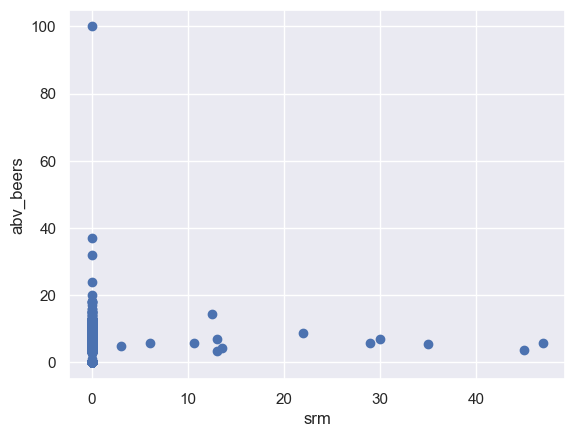

In [42]:
#plt.scatter(srm_flt, abv_beers_flt)
#plt.xlabel('srm')
#plt.ylabel('abv_beers')

In [45]:
# determine how many values are not zero
#nonzero_val = np.count_nonzero(srm_flt > 0)
#zero_val = np.count_nonzero(srm_flt == 0)
#print('Number of nonzero SRM values in dataset:', nonzero_val)
#print('Number of zeros in dataset:', zero_val)

Number of nonzero SRM values in dataset: 13
Number of zeros in dataset: 5808
